# Modelleringsprosjekt - Temperatur på jorda


#### Valerie Smidt

## 1. Hensikt

Lage en enkel modell som kalkulerer temperaturen på jordkloden

## 2. Teori

For å gå i gang med prosjektet er det en del ting vi må huske på.
Stefan Boltzmanns lov: Alle gjenstander med temperatur over absolutt nullpunkt (0 Kelvin) vil gi ut varmestråling.
$$ S = \sigma T^4$$ $$der \space \sigma = 5,6703*10^-8 W/(m^2K^4)$$
Hvor S er strålingen på et legme i W/m^2

Solkonstanten er gjennomsnittlig energi fra sola som treffer jordas atmosfære vertikalt:
$$Solkonstanten=1361 W/m^2$$

$$S=\frac{radius(sol)^2}{distanse(sol og planet)^2}*varmestråling\space sol$$


## 3. Gjennomføring

In [237]:
from pylab import*
#Noen Konstanter
sigma = 5.67e-8                                  #W/m^2K^4
temp_sol = 5778                                  #Kelvin
radius_sol = 6.95700e8                           #meter
distanse_jord_sol = 149.5978707e9                #meter
distanse_sol_atmosfære = distanse_jord_sol-100e3 #meter
radius_jord = 6.371e6                            #meter
albedo = 0.3


### Oppgave 1

In [238]:
varmestråling_sol = sigma*(temp_sol**4)
S = ((radius_sol)**2)/(distanse_jord_sol**2)*varmestråling_sol    #Regner ut solkonstanten
print(S)

1366.741531248521


Solkonstanen er 1361 W/m^2 og svaret vi kom fram er nærme nok med bare 0.42% avvik, men avviket kan være grunnet i at distansen varierer siden jorda går rundt sola i ellipser og ikke perfekte sirkler. Jeg velger å bruke svaret jeg fikk i senere oppgaver siden avviket fra solkonstanten er ikke så stor.

Hvorfor fungerer formelen:

Formelen for å regne ut overflaten av en kule er 4πr^2.
Det formelen jeg brukte egentlig gjør er at den finner forholdet mellom overflaten til jordkloden og overflaten til en imaginær kule som har sola i sentrum og strekker seg ut til jorda. Så blir det ganget med solas varmestråling. Jo lengere en planet er unna sola, jo mindre konsentrert blir varmestrålingen som treffer planeten. Så hvis jeg bruker samme formel for å finne solkonstanten på mars, får jeg bare 521 W/m^2 

### Oppgave 2

Hvis vi antar at temperaturen på planeten er konstant, så er energi inn lik energi ut i følge energiprinsippet. Jorda er en kule og vi vet at solståler er mest konentrert rundt ekvator og blir midre konsentrerte jo nærmere polene. Solkonstanten er en gjennomsnitt på hvor mye solenergi treffer en kvadratmeter, så vi kan derfor anta at jorda er en sirkel siden svaret vi skal få ut vil også være et gjennomsnitt av jordas temperatur.
Jeg finner en formel for temperatur på jorda ved å sette opp to formler:

$$Energi \space inn = Solkonstanten*(1-albedo)*πr_j^2$$
$$Energi \space ut = \sigma*T^4*4πr_j^2$$
Siden energi inn er lik energi ut setter jeg formlene sammen og prøver å få Temperatur (T) alene på en side. Vi kan fjerner πr^2 fra begge sidene og flytter resten. Formelen jeg kom fram til er:
$$T = \sqrt[4]{\frac{solkonstant*(1-albedo)}{4\sigma}}$$

In [239]:
T_kelvin = ((S*(1-albedo))/(4*sigma))**(1/4) #Jordas temperatur i Kelvin
T = T_kelvin-273.15 #grader celcius
print(T)

-18.299584881111002


Temperaturen vi fikk er mye lavere enn den faktiske gjennomsnittlige temperaturen på jorda på ca 15 grader Celcius. Dette er fordi vi antok at alle solstrålene som kommer inn i atmosfæren vil bli reflektert og kommer seg ut igjen. Men slik er det ikke i virkeligheten. For å får noe svar nærmere må vi legge til en atmosfære

### Oppgave 3

Jeg satt opp en likning for varmestrålingen som treffer jorda, og en annen for varmestrålingen som treffer atmosfæren. Når jeg satt dem sammen fikk jeg en formel for temperatur på jorda: 

In [240]:
T_sol=(2*((S)*(1-albedo))/sigma)**(1/4)   #formelen for temperatur på jorda 
T_sol_celcius= T_sol-273.15
print(T_sol_celcius)

155.45560099878963


Det er vel ikke så varmt på jorda, det er fortatt liv her. Svaret ble så høyt fordi vi antok at hele jorda blir truffet av solstråler, men i virkeligheten er det bare en fjeredel av den totale innstrålingen som treffer jorda nokså vertikalt om gangen. Dette skyldes jordas rotasjon rundt sin even akse. Så for å få en temperatur nærmere virkeligheten kan vi dele solkonstanten på fire:

In [241]:
T_sol_ny = (2*((S/4)*(1-albedo))/sigma)**(1/4)  #legger til S/4
T_sol_celcius_ny = T_sol_ny-273.15
print(T_sol_celcius_ny)

29.919926920779858


Dette tallet er fortsatt 15 celcius over den faktiske gjennomsnittlige temperaturen. Dette er fordi atmosfæren selv tar opp en del av energien fra varmestrålingen. Da er det å legge til noe mer i utregningen:

### Oppgave 4

Med noe søking på nettet fant jeg ut at 23% av strålingen blir absorbert av amosfæren.Hvis man tenker på atmosfæren som en lag med gasser, så er det to retninger atmosfæren kan sende ut stråling, ned til jorda og ut i verdensrommet. Jeg antar at atmosfæren sender ut ca halvparten ut og halvparten inn. Da er det bare å legge til 23% delt på to: 

In [242]:
T_sol=(2*((S/4)*(1-albedo-0.23/2))/sigma)**(1/4)  #legger til 0.23/2
T_sol_celcius= T_sol-273.15
print(T_sol_celcius)

16.62258881323305


Her har vi kommet nærme, men er det kanskje noe mer å legge til? Jeg tenker at jorda vil også reflektere en del av strålingen. Her var det litt vanskelig å finne en nøyaktig tall, men f.eks North Carolina Climate Office skrev at jorda reflekterte 4% av de 51% som hadde nådd jordoverflaten. Men det er vel ikke de hele 4% som blir absorbert av atmosfæren, men kanskje bare 70%, og resten (albedo) blir reflektert tilbake til jorda.

In [244]:
T_sol=(2*((S/4)*(1-albedo-0.23/2-(albedo*0.04)))/sigma)**(1/4) #legger til solstrålene som blir reflektert av joroverflaten
T_sol_celcius= T_sol-273.15
print(f'Beregningen av gjennomsnittstemperaturen inkludert atmosfæren gir en temperatur på {round(T_sol_celcius,2)} celsius')

Beregningen av gjennomsnittstemperaturen inkludert atmosfæren gir en temperatur på 15.13 celsius


### Oppgave 5

Jorda går i ellipser rundt sola. I tilegg er jordas akse skråstilt og tilter gjennom året. Derfor er det sommer i den nordlige halvkulen når aksen er tiltet mot sola, og vinter i den sørlige halvkulen. Her i norge opplever vi 4 årstider siden vi blir veldig påvirket av hvor jordas akse peker, men i land nærme ekvator er temperaturen mer stabil gjennom året. Der kan man tenke at det finnes bare to årstider, våt og tørr årstid, men begge er varme. Så hvis jeg skal modellere temperaturen i et land gjennom et år, er det enklest å ta et land rundt ekvator. Jeg velger Ecuador siden den ligger på ekvator og er oppkalt etter den. Siden landet ligger ved ekvator, så er det avstanden mellom jorda og sola som påvirker temperaturen mest gjennom ett år. Det er slik at sola ikke ligger helt i sentrum av jordas ellipse, så hvis man søker litt, finner vi ut at jorda er faktisk nærmest sola i Januar og lengs unna sola i Juli. 

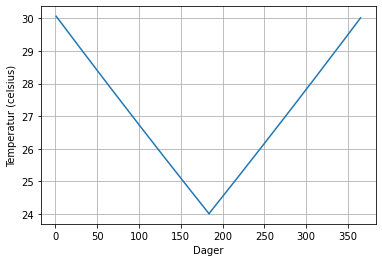

In [245]:
import numpy 
perihelion = 146e9   #korteste avstanden mellom jorda og sola i Januar i meter
aphelion = 152e9     #lengste avstanden mellom jorda og sola i Juli i meter 
distanse = perihelion

distanse_liste = [146e9] #liste for antall dager i ett år
solintensitet = []       #array for intensitet av solinnstrålingen i W/m^2
dager = []               
temp = []
dis = distanse_liste     #forkortelser
solin = solintensitet

for a in range(366):     #lager en liste med dagene i ett år
    dager.append(a)
dager.remove(0)          

for dag in range(364):   #lager en loop som regner ut avstanden mellom joda og sola og legger det til en liste
    if dag < 365/2:
        perihelion = perihelion + ((152e9-146e9)/(365/2))
        dis.append(perihelion)
    else:
        aphelion = aphelion - ((152e9-146e9)/(365/2))
        dis.append(aphelion)
        
for i in range(365):    #nå som vi vet avstanden, kan vi regne ut mengden solinnstråling per kvadratmeter
    S = ((radius_sol)**2)/(dis[i]**2)*varmestråling_sol
    solin.append(S)
    
for i in range(365):    #loop som regner ut gjennomsnittlig temperatur for hver dag
    T_sol = (2*((solin[i]/4)*(1-0.205-0.23/2-(albedo*0.04)))/sigma)**(1/4)
    T_sol_celcius = T_sol-273.15
    temp.append(T_sol_celcius)
    
plot(dager,temp)
xlabel("Dager")
ylabel("Temperatur (celsius)")
grid()
show()


## 4. Diskusjon

I oppgave 5 så antok jeg at jordas fart rundt sola er konstant, så jeg tok like lange steg for hver dag. Men slik er det ikke i virkeligheten, siden farten blir større jo nærmere sola. Dette var en forenkling. Ecuador har også en lavere albedo enn jordas gjennomsnitt, og jeg var usikker på hvordan jeg skulle finne den ut. På nettet fant jeg ut at albedo til grønt gress er 0.25, albedo til jord er 0.17 og albedo til skog er 0.15. Jeg så på en satelittbilde av Ecuador or antok at en gjennomsnittsalbdeo er 0.205. Det er også mange andre ting jeg ikke tok hensyn til, for eksempel Ekuador har en fuktig klima,og det er slik at fuktig luft holder varmen mer effektivt enn tørr luft. Denne fuktigheten varierer rundt året. En annen ting jeg ikke fikk ta med i modellen er solgangsvind. Ecuador grenser sjøen, som blir varmet opp på dagen og vil gi varme til landet om natten. Modellen jeg lagde er veldig enkel og ikke nøyaktig.

## 5. Konklusjon

Jeg har fått til å regne ut gjennomsnittlig varmestråling, temperatur på jorda uten atmosfære og temperatur på jorda med ulike modeller for atmosfæren. 

I tillegg lagde jeg en forenklet modell for temperaturen i Ecuador over ett år. Modellen kan utviddes ved å ta hennsyn til fuktigheten i luften, landets terreng og solgangsvind.